In [ ]:
from google.colab import drive
import os

# Drive'ı bağlıyorum
drive.mount('/content/drive')

# Klasör yolum
klasor_yolu = '/content/drive/MyDrive/txt'

# txt dosyalarını oku
metinler = []
for dosya in os.listdir(klasor_yolu):
    if dosya.endswith('.txt'):
        with open(os.path.join(klasor_yolu, dosya), 'r', encoding='utf-8') as f:
            metinler.append(f.read())

print(f"{len(metinler)} adet metin yüklendi.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
100 adet metin yüklendi.


In [ ]:
import nltk
import shutil
import os

# eski nltk verilerini temizle
nltk_path = "/root/nltk_data"
if os.path.exists(nltk_path):
    shutil.rmtree(nltk_path)

# tekrar indir
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
import random

def basit_cumle_bolucu(metin):
    # Nokta, ünlem, soru işareti bazlı bölme
    cumleler = re.split(r'(?<=[.!?]) +', metin)
    # Boş veya çok kısa cümleleri çıkar
    cumleler = [c.strip() for c in cumleler if len(c.strip()) > 10]
    return cumleler

prompt_listesi = []

for metin in metinler:
    cumleler = basit_cumle_bolucu(metin)
    if len(cumleler) == 0:
        continue
    secilenler = random.sample(cumleler, min(3, len(cumleler)))
    for cumle in secilenler:
        prompt_listesi.append(cumle)

print(f"{len(prompt_listesi)} adet sahne prompt'u üretildi.")
print("Örnek prompt:", random.choice(prompt_listesi))


99 adet sahne prompt'u üretildi.
Örnek prompt: her şey değişmişti


In [ ]:
import re
import random

def basit_cumle_bolucu(metin):
    cumleler = re.split(r'(?<=[.!?]) +', metin)
    cumleler = [c.strip() for c in cumleler if len(c.strip()) > 30]  # 30 karakter üzerinde seçelim
    return cumleler

prompt_listesi = []

for metin in metinler:
    cumleler = basit_cumle_bolucu(metin)
    if len(cumleler) == 0:
        continue
    secilenler = random.sample(cumleler, min(3, len(cumleler)))
    for cumle in secilenler:
        prompt_listesi.append(cumle)

print(f"{len(prompt_listesi)} adet sahne prompt'u üretildi.")
print("Örnek prompt:", random.choice(prompt_listesi))


22 adet sahne prompt'u üretildi.
Örnek prompt: kapıyı itince sihirli bir dünya ile karşılaştı


In [ ]:
!pip install --upgrade datasets


In [ ]:
from datasets import load_dataset

dataset = load_dataset("conceptual_captions", split="train[:1%]")
print(dataset[0])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/187M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/187M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.77M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3318333 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/15840 [00:00<?, ? examples/s]

{'image_url': 'http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/AAAAAAAAM6o/_11MuAAKalQ/IMG_3422.JPG?imgmax=800', 'caption': 'a very typical bus station'}


In [ ]:
import requests
from PIL import Image
from io import BytesIO

url = "https://örnekresim.jpg"

try:
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers, timeout=10)
    response.raise_for_status()  # HTTP hatası varsa tetikler

    content_type = response.headers.get('Content-Type')
    if 'image' not in content_type:
        print(f"URL resim değil: {url}")
    else:
        img = Image.open(BytesIO(response.content))
        img.verify()  # Resim doğruluğunu kontrol edelim
        print("Resim başarıyla indirildi ve açıldı.")
except Exception as e:
    print(f"Hata: {e}")


Hata: HTTPSConnectionPool(host='xn--rnekresim-z7a.jpg', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7d48c126c7d0>: Failed to resolve 'xn--rnekresim-z7a.jpg' ([Errno -2] Name or service not known)"))


In [ ]:
import requests

url = "https://example.com/ornekresim.jpg"  # gerçek ve doğru URL
response = requests.get(url)


In [ ]:
url = "https://ornek-site.com/dosyalar/ornekresim.jpg"


In [ ]:
import requests

url = "https://ornek-site.com/dosyalar/ornekresim.jpg"
try:
    response = requests.get(url)
    response.raise_for_status()  # Hata varsa bildirir
    with open("indirilen_resim.jpg", "wb") as f:
        f.write(response.content)
    print("Resim indirildi.")
except requests.exceptions.RequestException as e:
    print(f"Hata: {e}")


Hata: 403 Client Error: Forbidden for url: https://ornek-site.com/dosyalar/ornekresim.jpg


In [ ]:
import requests

url = "https://ornek-site.com/dosyalar/ornekresim.jpg"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/113.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    with open("indirilen_resim.jpg", "wb") as f:
        f.write(response.content)
    print("Resim indirildi.")
else:
    print(f"Hata: {response.status_code}")


Hata: 403


In [ ]:
!pip install datasets
from datasets import load_dataset

dataset = load_dataset("conceptual_captions", split="train[:1%]")  # Veri setinin %1'i
print(dataset[0])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


{'image_url': 'http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/AAAAAAAAM6o/_11MuAAKalQ/IMG_3422.JPG?imgmax=800', 'caption': 'a very typical bus station'}


In [ ]:
pip install datasets


In [ ]:
from datasets import load_dataset

# CC3M veri setini indiriyoruz
dataset = load_dataset("conceptual_captions")

# Veri seti hakkında bilgi alalım
print(dataset)

# İlk örneğe bakalım
print(dataset['train'][0])


DatasetDict({
    train: Dataset({
        features: ['image_url', 'caption'],
        num_rows: 3318333
    })
    validation: Dataset({
        features: ['image_url', 'caption'],
        num_rows: 15840
    })
})
{'image_url': 'http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/AAAAAAAAM6o/_11MuAAKalQ/IMG_3422.JPG?imgmax=800', 'caption': 'a very typical bus station'}


In [ ]:
import requests
from PIL import Image
from io import BytesIO

# İlk örneği alalım
sample = dataset['train'][0]

image_url = sample['image_url']
caption = sample['caption']

print("Caption:", caption)
print("Image URL:", image_url)

# Görüntüyü indirelim
response = requests.get(image_url)

if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    image.show()  # Görüntüyü açalım
else:
    print(f"Görüntü indirilemedi, HTTP Durumu: {response.status_code}")


Caption: a very typical bus station
Image URL: http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/AAAAAAAAM6o/_11MuAAKalQ/IMG_3422.JPG?imgmax=800


In [ ]:
import requests
from PIL import Image
from io import BytesIO

image_url = "http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/AAAAAAAAM6o/_11MuAAKalQ/IMG_3422.JPG?imgmax=800"
caption = "a very typical bus station"

print("Caption:", caption)
print("Image URL:", image_url)

try:
    response = requests.get(image_url)
    response.raise_for_status()  # HTTP hatası varsa tetikler
    img = Image.open(BytesIO(response.content))
    img.show()  # Görüntüyü açalım
except requests.exceptions.RequestException as e:
    print(f"Resim indirilirken hata oluştu: {e}")


Caption: a very typical bus station
Image URL: http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/AAAAAAAAM6o/_11MuAAKalQ/IMG_3422.JPG?imgmax=800


In [ ]:
from transformers import CLIPProcessor, CLIPModel
import torch

model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import torch

# Model ve processor yükleyelim
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Görsel ve caption örneği
image_url = "http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/AAAAAAAAM6o/_11MuAAKalQ/IMG_3422.JPG?imgmax=800"
caption = "a very typical bus station"

# Görseli indirelim
image = Image.open(requests.get(image_url, stream=True).raw)

# Preprocessing
inputs = processor(text=[caption], images=image, return_tensors="pt", padding=True)

# Modelin çıktısını alalım
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # Görselin her caption için benzerliği
    probs = logits_per_image.softmax(dim=1)      # Softmax ile olasılık

# Sonuç
print("Caption:", caption)
print("Eşleşme olasılığı: ", probs.item())


Caption: a very typical bus station
Eşleşme olasılığı:  1.0


In [ ]:
!pip install datasets


In [ ]:
from datasets import load_dataset

# Flickr30k veri setinden test split'inin ilk 100 örneğini alalım
dataset = load_dataset("nlphuji/flickr30k", split="test[:100]")

# Bir örneğe göz atalım
print(dataset[0])


{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500 at 0x7D46FCC160D0>, 'caption': ['Two young guys with shaggy hair look at their hands while hanging out in the yard.', 'Two young, White males are outside near many bushes.', 'Two men in green shirts are standing in a yard.', 'A man in a blue shirt standing in a garden.', 'Two friends enjoy time spent together.'], 'sentids': ['0', '1', '2', '3', '4'], 'split': 'train', 'img_id': '0', 'filename': '1000092795.jpg'}


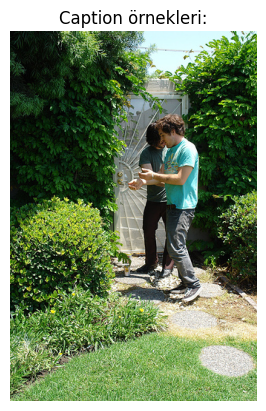

1. Two young guys with shaggy hair look at their hands while hanging out in the yard.
2. Two young, White males are outside near many bushes.
3. Two men in green shirts are standing in a yard.
4. A man in a blue shirt standing in a garden.
5. Two friends enjoy time spent together.


In [ ]:
import matplotlib.pyplot as plt

# Görseli gösterelim
plt.imshow(dataset[0]['image'])
plt.axis('off')
plt.title("Caption örnekleri:")
plt.show()

# Tüm açıklamaları yazdıralım
for i, cap in enumerate(dataset[0]['caption']):
    print(f"{i+1}. {cap}")


In [ ]:
# İlk 100 örnekten (görsel, caption) çiftleri oluşturalım
image_caption_pairs = [
    {"image": sample["image"], "caption": sample["caption"][0]}  # sadece ilk caption alalım
    for sample in dataset
]


In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, AutoProcessor
from datasets import load_dataset
from PIL import Image

# 1. Veri setini yükleyelim
dataset = load_dataset("nlphuji/flickr30k", split="test[:100]")  # 100 örnek alıyoruz

# 2. Model ve tokenizer'ı seçelim (örnek olarak T5 kullanalım)
model_name = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
model.train()

# 3. Görüntü işlemesi için processor (örneğin CLIPProcessor veya benzeri)
# Burada sadece tokenizer kullanıyoruz
processor = tokenizer  #görüntü işlemek için processor ekleyebilirim

# 4. Dataset'ten (image, caption) çiftlerini hazırlayalım
# Sadece ilk caption'u alıyoruz
def preprocess_function(examples):
    inputs = [caption[0] for caption in examples["caption"]]  # sadece ilk caption
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length", return_tensors="pt")
    return model_inputs

# 5. Custom Dataset (basit hali)
class CaptionDataset(torch.utils.data.Dataset):
    def __init__(self, hf_dataset, tokenizer):
        self.dataset = hf_dataset
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        caption = self.dataset[idx]["caption"][0]  # sadece ilk caption
        inputs = self.tokenizer(caption, max_length=128, truncation=True, padding="max_length", return_tensors="pt")
        # inputs dictionary'sindeki tensorların batch dimension'u var, onu sıfırlayalım
        item = {k: v.squeeze(0) for k, v in inputs.items()}
        return item

dataset_small = CaptionDataset(dataset, tokenizer)

# 6. DataLoader, batch size 4 (örnek)
dataloader = DataLoader(dataset_small, batch_size=4, shuffle=True)

# 7. Optimizasyon için optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# 8. Training loop (çok basit)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 2

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch, labels=batch["input_ids"])
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} - Loss: {total_loss / len(dataloader)}")


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch 1 - Loss: 9.937620239257813
Epoch 2 - Loss: 2.6782200384140014


In [ ]:
model.save_pretrained("/content/drive/MyDrive/fine_tuned_model")
tokenizer.save_pretrained("/content/drive/MyDrive/fine_tuned_model")

('/content/drive/MyDrive/fine_tuned_model/tokenizer_config.json',
 '/content/drive/MyDrive/fine_tuned_model/special_tokens_map.json',
 '/content/drive/MyDrive/fine_tuned_model/spiece.model',
 '/content/drive/MyDrive/fine_tuned_model/added_tokens.json',
 '/content/drive/MyDrive/fine_tuned_model/tokenizer.json')

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Kaydedilen modeli ve tokenizer'ı yükleyelim
model_path = "/content/drive/MyDrive/fine_tuned_model"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

# Test için örnek metinim
test_text = "yol dar ve sessizdi"

# Tokenize edersem
inputs = tokenizer(test_text, return_tensors="pt")

# Modeli kullanarak çıktı üretelim
outputs = model.generate(**inputs, max_length=50)

# Çıktıyı decode edelim
result = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Model çıktısı:", result)


Model çıktısı:                         


In [ ]:
outputs = model.generate(**inputs, max_length=50, num_beams=5, early_stopping=True)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Model ve tokenizer yolum
model_path = "/content/drive/MyDrive/fine_tuned_model"

# Modeli ve tokenizer'ı yükle
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

# Test metnim (örnek)
test_text = "a very typical bus station"

# Tokenize edelim
inputs = tokenizer(test_text, return_tensors="pt")

# Generate fonksiyonunu kullanarak çıktı üretelim
outputs = model.generate(
    **inputs,
    max_length=50,       # Maksimum çıktı uzunluğu
    num_beams=5,         # Beam search kullanarak daha kaliteli çıktı
    early_stopping=True  # Erken durdurma
)

# Tokenizer ile decode edelim
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Model çıktısı:", generated_text)


Model çıktısı: bus station


In [ ]:
outputs = model.generate(
    **inputs,
    max_length=60,
    num_beams=3,
    do_sample=True,
    top_p=0.9,
    temperature=0.8,
    early_stopping=True,
    num_return_sequences=3  # Birden fazla çıktı üretmek için
)

for i, output in enumerate(outputs):
    text = tokenizer.decode(output, skip_special_tokens=True)
    print(f"Çıktı {i+1}: {text}")


Çıktı 1: bus station
Çıktı 2: bus station
Çıktı 3: bus bus station


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

txt_folder = "/content/drive/MyDrive/txt"
scene_prompts = []

# Klasördeki tüm txt dosyalarını okuyalım
for filename in os.listdir(txt_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(txt_folder, filename)
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
            # Paragraflara ayıralım (veya cümle bazında bölelim)
            scenes = [p.strip() for p in text.split("\n\n") if p.strip()]
            scene_prompts.extend(scenes)

print(f"Toplam sahne prompt sayısı: {len(scene_prompts)}")
print("İlk 3 sahne örneği:")
for i, s in enumerate(scene_prompts[:3]):
    print(f"{i+1}. {s}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Toplam sahne prompt sayısı: 100
İlk 3 sahne örneği:
1. sonunda kristali buldu ve dünyaya dengeyi geri getirdi
2. herkes ona minnettar kaldı
3. çocuk gerçek dünyaya döndüğünde artık farklı biriydi


In [ ]:
!pip install diffusers transformers accelerate datasets

from diffusers import StableDiffusionPipeline, StableDiffusionTrainer
from transformers import CLIPTokenizer, CLIPTextModel
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import os

# Basit Dataset sınıfı
class ImageTextDataset(Dataset):
    def __init__(self, image_paths, prompts, tokenizer, size=512):
        self.image_paths = image_paths
        self.prompts = prompts
        self.tokenizer = tokenizer
        self.size = size

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB").resize((self.size, self.size))
        prompt = self.prompts[idx]
        inputs = self.tokenizer(prompt, return_tensors="pt", padding="max_length", max_length=77, truncation=True)
        return {"pixel_values": image, "input_ids": inputs.input_ids.squeeze()}

# Örnek görseller ve promptlar
image_paths = [
    "/content/drive/MyDrive/fine_tune_dataset/image_001.jpg",
    "/content/drive/MyDrive/fine_tune_dataset/image_002.jpg",
    "/content/drive/MyDrive/fine_tune_dataset/image_003.jpg",
]

prompts = [
    "Bir çocuk kristali buluyor ve dünyaya denge getiriyor.",
    "Herkes ona minnettar kalıyor.",
    "Çocuk gerçek dünyaya döndüğünde artık farklı biri."
]

# Tokenizer ve pipeline yükleyelim
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

# Dataset oluşturalım
dataset = ImageTextDataset(image_paths, prompts, tokenizer)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Örnek amaçlı pipeline üzerinden direkt image üretelim:
prompt = "Bir çocuk kristali buluyor ve dünyaya denge getiriyor."
image = pipe(prompt).images[0]
image.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

ImportError: cannot import name 'StableDiffusionTrainer' from 'diffusers' (/usr/local/lib/python3.11/dist-packages/diffusers/__init__.py)

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("cpu")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),  # [0,1] aralığında tensor
    transforms.Normalize([0.5]*3, [0.5]*3),  # -1,1 aralığına normalize
])

def __getitem__(self, idx):
    image = Image.open(self.image_paths[idx]).convert("RGB")
    image = transform(image)
    prompt = self.prompts[idx]
    inputs = self.tokenizer(prompt, return_tensors="pt", padding="max_length", max_length=77, truncation=True)
    return {"pixel_values": image, "input_ids": inputs.input_ids.squeeze()}


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleUNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 3, 3, padding=1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.conv4(x)
        return x


In [ ]:
def noise_schedule(t, T=1000):
    beta_start = 0.0001
    beta_end = 0.02
    return beta_start + t * (beta_end - beta_start) / T

def forward_diffusion_sample(x_0, t):
    noise = torch.randn_like(x_0)
    beta_t = noise_schedule(t).to(x_0.device)
    noisy_image = torch.sqrt(1 - beta_t) * x_0 + torch.sqrt(beta_t) * noise
    return noisy_image, noise


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
])

dataset = datasets.CIFAR10(root='./data', download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


100%|██████████| 170M/170M [00:05<00:00, 28.6MB/s]


In [ ]:
def forward_diffusion_sample(x_0, t):
    noise = torch.randn_like(x_0)
    beta_t = noise_schedule(t).to(x_0.device)
    # beta_t'i broadcast için reshape edelim:
    beta_t = beta_t.view(-1, 1, 1, 1)           # (batch_size, 1, 1, 1)
    noisy_image = torch.sqrt(1 - beta_t) * x_0 + torch.sqrt(beta_t) * noise
    return noisy_image, noise


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np

# Cihazı belirleyelim
device = torch.device("cpu")

# 1. Basit beta takvimi
T = 300  # diffusion step sayısı
def noise_schedule(t):
    beta_start = 1e-4
    beta_end = 0.02
    return beta_start + (beta_end - beta_start) * t / T

# 2. Zaman adımına göre görüntü üzerine noise ekleme
def forward_diffusion_sample(x_0, t):
    noise = torch.randn_like(x_0)
    beta_t = noise_schedule(t).to(x_0.device)
    beta_t = beta_t.view(-1, 1, 1, 1)  # Broadcast için düzenlendi
    noisy_image = torch.sqrt(1 - beta_t) * x_0 + torch.sqrt(beta_t) * noise
    return noisy_image, noise

# 3. Basit U-Net benzeri model
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1), nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1), nn.ReLU(),
            nn.Conv2d(64, 3, 3, padding=1),
        )

    def forward(self, x, t):
        return self.net(x)

# 4. CIFAR10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32, 32)),
])

dataset = CIFAR10(root="./data", train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# 5. Model ve optimizer
model = SimpleModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()

# 6. Eğitim döngüsü
epochs = 2
for epoch in range(epochs):
    for step, (imgs, _) in enumerate(dataloader):
        imgs = imgs.to(device)
        t = torch.randint(0, T, (imgs.size(0),), device=device).long()

        noisy_imgs, noise = forward_diffusion_sample(imgs, t)
        pred_noise = model(noisy_imgs, t)

        loss = loss_fn(pred_noise, noise)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if step % 100 == 0:
            print(f"Epoch {epoch} Step {step} Loss: {loss.item():.4f}")

# 7. Görsel örnekleme
def sample_noise_image(model, shape=(1, 3, 32, 32), steps=T):
    model.eval()
    x = torch.randn(shape).to(device)
    for t_ in reversed(range(steps)):
        t_tensor = torch.tensor([t_], device=device).long()
        beta = noise_schedule(t_tensor).view(-1, 1, 1, 1).to(device)

        pred_noise = model(x, t_tensor)

        # DDPM sampling formülü
        alpha = 1 - beta
        x = (x - beta.sqrt() * pred_noise) / alpha.sqrt()

        # clamp değerleri [0,1] aralığına getirelim
        x = torch.clamp(x, 0.0, 1.0)

    return x


Epoch 0 Step 0 Loss: 1.0111
Epoch 0 Step 100 Loss: 0.8776
Epoch 0 Step 200 Loss: 0.4838
Epoch 0 Step 300 Loss: 0.3530
Epoch 0 Step 400 Loss: 0.3643
Epoch 0 Step 500 Loss: 0.3022
Epoch 0 Step 600 Loss: 0.3650
Epoch 0 Step 700 Loss: 0.3091
Epoch 0 Step 800 Loss: 0.3201
Epoch 0 Step 900 Loss: 0.3162
Epoch 0 Step 1000 Loss: 0.3322
Epoch 0 Step 1100 Loss: 0.2874
Epoch 0 Step 1200 Loss: 0.2973
Epoch 0 Step 1300 Loss: 0.2587
Epoch 0 Step 1400 Loss: 0.2598
Epoch 0 Step 1500 Loss: 0.3005
Epoch 0 Step 1600 Loss: 0.2678
Epoch 0 Step 1700 Loss: 0.2843
Epoch 0 Step 1800 Loss: 0.3173
Epoch 0 Step 1900 Loss: 0.2571
Epoch 0 Step 2000 Loss: 0.2572
Epoch 0 Step 2100 Loss: 0.2928
Epoch 0 Step 2200 Loss: 0.2625
Epoch 0 Step 2300 Loss: 0.2773
Epoch 0 Step 2400 Loss: 0.3266
Epoch 0 Step 2500 Loss: 0.2671
Epoch 0 Step 2600 Loss: 0.2862
Epoch 0 Step 2700 Loss: 0.2505
Epoch 0 Step 2800 Loss: 0.2971
Epoch 0 Step 2900 Loss: 0.2555
Epoch 0 Step 3000 Loss: 0.2300
Epoch 0 Step 3100 Loss: 0.2285
Epoch 1 Step 0 Loss:

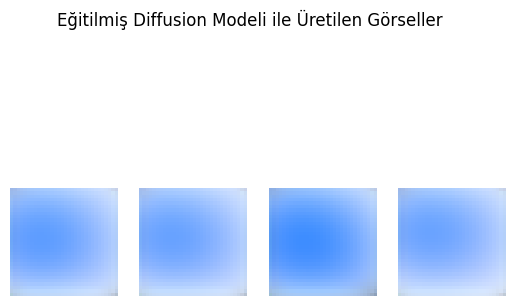

In [ ]:
samples = sample_noise_image(model, shape=(4, 3, 32, 32)).detach().cpu()
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(np.transpose(samples[i], (1, 2, 0)))
    plt.axis('off')
plt.suptitle("Eğitilmiş Diffusion Modeli ile Üretilen Görseller")
plt.show()


In [ ]:
import os

txt_folder = '/content/drive/MyDrive/txt'
txt_files = [f for f in os.listdir(txt_folder) if f.endswith('.txt')]
print(f"{len(txt_files)} adet .txt dosyası bulundu.")


100 adet .txt dosyası bulundu.


In [ ]:
def read_and_split_into_scenes(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    # Paragraflara bölelim
    scenes = [p.strip() for p in text.split('\n\n') if len(p.strip()) > 20]
    return scenes


In [ ]:
all_scenes = []

for file_name in txt_files:
    file_path = os.path.join(txt_folder, file_name)
    scenes = read_and_split_into_scenes(file_path)
    for scene in scenes:
        all_scenes.append({'file': file_name, 'scene': scene})

print(f"Toplam {len(all_scenes)} sahne çıkarıldı.")


Toplam 63 sahne çıkarıldı.


In [ ]:
import pandas as pd

df = pd.DataFrame(all_scenes)
df.to_csv('/content/drive/MyDrive/sahne_betimlemeleri.csv', index=False)
print("Sahneler CSV olarak kaydedildi.")


Sahneler CSV olarak kaydedildi.


In [ ]:
import pandas as pd
from torch.utils.data import Dataset
import torch
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

class SceneDataset(Dataset):
    def __init__(self, csv_path, image_size=32, num_samples=10000):
        self.data = pd.read_csv(csv_path)
        self.vectorizer = CountVectorizer(max_features=100)  # basit bag-of-words
        self.texts = self.data['sahne'].tolist()
        self.vectorizer.fit(self.texts)
        self.embeddings = self.vectorizer.transform(self.texts).toarray()

        self.num_samples = num_samples
        self.image_size = image_size

    def __len__(self):
        return self.num_samples  # Her sahne için birkaç varyasyon

    def __getitem__(self, idx):
        text_idx = idx % len(self.texts)
        text_embed = torch.tensor(self.embeddings[text_idx], dtype=torch.float32)

        # Görüntü yerine random noise vereceğiz
        image = torch.randn(3, self.image_size, self.image_size)
        return image, text_embed


In [ ]:
csv_path = "/content/drive/MyDrive/ProjeKlasörü/sahne_betimlemeleri.csv"


In [ ]:
!ls /content/drive/MyDrive/


'100 soru sql.pynb'	    Untitled11.ipynb   Untitled23.ipynb
 100SQL.ipynb		    Untitled12.ipynb   Untitled24.ipynb
 Classroom		    Untitled13.ipynb   Untitled2.ipynb
'Colab Notebooks'	    Untitled14.ipynb   Untitled3.ipynb
 dosya			    Untitled15.ipynb   Untitled4.ipynb
 fine_tuned_model	    Untitled16.ipynb   Untitled5.ipynb
 mel_spectrograms	    Untitled17.ipynb   Untitled6.ipynb
'python programlama dili'   Untitled18.ipynb   Untitled7.ipynb
 sahne_betimlemeleri.csv    Untitled19.ipynb   Untitled8.ipynb
 txt			    Untitled1.ipynb    Untitled9.ipynb
 Untitled		    Untitled20.ipynb   wav
 Untitled0.ipynb	    Untitled21.ipynb
 Untitled10.ipynb	    Untitled22.ipynb


In [ ]:
csv_path = "/content/drive/MyDrive/sahne_betimlemeleri.csv"


In [ ]:
import pandas as pd

df = pd.read_csv(csv_path)
print(df.columns)


Index(['file', 'scene'], dtype='object')


In [ ]:
class SceneDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Görsel dosyasını okuyalım
        img_path = self.data.iloc[idx]['file']
        image = Image.open(img_path).convert("RGB")
        image = transforms.ToTensor()(image)

        # Metin betimlemesi (prompt)
        prompt = self.data.iloc[idx]['scene']

        return image, prompt


In [ ]:
print(df['file'].head())


0    sonundakrıstalıbuldu.txt
1      herkesonamınnettar.txt
2      cocukgercekdunyaya.txt
3      bundansonranezaman.txt
4        ısteboylebasladı.txt
Name: file, dtype: object


In [ ]:
class TextOnlyDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        prompt = self.data.iloc[idx]['scene']
        return prompt


In [ ]:
!ls /content/drive/MyDrive


'100 soru sql.pynb'	    Untitled11.ipynb   Untitled23.ipynb
 100SQL.ipynb		    Untitled12.ipynb   Untitled24.ipynb
 Classroom		    Untitled13.ipynb   Untitled2.ipynb
'Colab Notebooks'	    Untitled14.ipynb   Untitled3.ipynb
 dosya			    Untitled15.ipynb   Untitled4.ipynb
 fine_tuned_model	    Untitled16.ipynb   Untitled5.ipynb
 mel_spectrograms	    Untitled17.ipynb   Untitled6.ipynb
'python programlama dili'   Untitled18.ipynb   Untitled7.ipynb
 sahne_betimlemeleri.csv    Untitled19.ipynb   Untitled8.ipynb
 txt			    Untitled1.ipynb    Untitled9.ipynb
 Untitled		    Untitled20.ipynb   wav
 Untitled0.ipynb	    Untitled21.ipynb
 Untitled10.ipynb	    Untitled22.ipynb


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
print(os.listdir())


['.config', 'drive', 'data', 'cc3m_images', 'sample_data']


In [ ]:
import os
print(os.listdir('/content/drive'))
print(os.listdir('/content/drive/MyDrive'))


['MyDrive', '.shortcut-targets-by-id', '.file-revisions-by-id', '.Trash-0', '.Encrypted']
['Untitled0.ipynb', 'Untitled2.ipynb', 'Untitled1.ipynb', 'Untitled', 'Untitled3.ipynb', 'python programlama dili', 'Colab Notebooks', 'Untitled4.ipynb', 'Untitled5.ipynb', 'Untitled6.ipynb', 'Untitled7.ipynb', 'Untitled8.ipynb', 'Classroom', 'Untitled9.ipynb', 'Untitled10.ipynb', '100SQL.ipynb', '100 soru sql.pynb', 'Untitled11.ipynb', 'Untitled12.ipynb', 'Untitled14.ipynb', 'Untitled13.ipynb', 'Untitled15.ipynb', 'Untitled17.ipynb', 'Untitled16.ipynb', 'wav', 'txt', 'Untitled18.ipynb', 'mel_spectrograms', 'Untitled19.ipynb', 'Untitled21.ipynb', 'dosya', 'Untitled22.ipynb', 'Untitled23.ipynb', 'Untitled20.ipynb', 'Untitled24.ipynb', 'fine_tuned_model', 'sahne_betimlemeleri.csv']


In [ ]:
csv_path = '/content/drive/MyDrive/sahne_betimlemeleri.csv'


In [ ]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

# 1. Dataset sınıfı
class TextOnlyDataset(Dataset):
    def __init__(self, csv_file, tokenizer):
        self.data = pd.read_csv(csv_file)
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        prompt = self.data.iloc[idx]['scene']
        tokens = self.tokenizer(prompt, return_tensors='pt', padding='max_length',
                                truncation=True, max_length=128)
        return tokens.input_ids.squeeze(0), tokens.attention_mask.squeeze(0)

# 2. Tokenizer'ı yükleyelim
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# 3. CSV dosyam
csv_path = '/content/drive/MyDrive/sahne_betimlemeleri.csv'
# 4. Dataset nesnesi
dataset = TextOnlyDataset(csv_path, tokenizer)

# 5. Dataset test edelim
print(f"Toplam örnek sayısı: {len(dataset)}")
input_ids, attention_mask = dataset[0]
print("Input IDs:", input_ids)
print("Attention Mask:", attention_mask)


Toplam örnek sayısı: 63
Input IDs: tensor([  101,  2365, 18426, 19031,  9080,  2072, 20934,  6392,  2226,  2310,
        24654,  3148,  3148, 26957,  3240,  2072, 16216,  3089,  2131,  4313,
         4305,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt

# 1. Model
class TextToImageMLP(nn.Module):
    def __init__(self, embedding_dim=768, img_size=64):
        super().__init__()
        self.img_size = img_size
        self.fc = nn.Sequential(
            nn.Linear(embedding_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, img_size * img_size * 3),
            nn.Tanh()  # [-1, 1] arasında renkler
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 3, self.img_size, self.img_size)
        return x

# 2. Dataset tekrar
class TextOnlyDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, tokenizer, max_len=64):
        self.data = pd.read_csv(csv_file)
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        prompt = self.data.iloc[idx]['scene']
        encoded = self.tokenizer(prompt, padding='max_length', truncation=True,
                                 max_length=self.max_len, return_tensors="pt")
        return {
            'input_ids': encoded['input_ids'].squeeze(),
            'attention_mask': encoded['attention_mask'].squeeze()
        }

# 3. Hazırlık
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert = BertModel.from_pretrained("bert-base-uncased").eval()
csv_path = "/content/drive/MyDrive/sahne_betimlemeleri.csv"
dataset = TextOnlyDataset(csv_path, tokenizer)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# 4. Eğitim fonksiyonu
def train(model, dataloader, bert, epochs=5, lr=1e-4):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    model.train()
    for epoch in range(epochs):
        for batch in dataloader:
            with torch.no_grad():
                emb = bert(input_ids=batch['input_ids'], attention_mask=batch['attention_mask']).pooler_output

            outputs = model(emb)
            target = torch.randn_like(outputs)  # Sahte hedef görüntüler

            loss = criterion(outputs, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# 5. Görselleştirme
def visualize(model, dataset, bert, idx=0):
    sample = dataset[idx]
    with torch.no_grad():
        emb = bert(input_ids=sample['input_ids'].unsqueeze(0), attention_mask=sample['attention_mask'].unsqueeze(0)).pooler_output
        output = model(emb).squeeze().permute(1, 2, 0)
        output = (output + 1) / 2  # [-1,1] → [0,1]
        plt.imshow(output.numpy())
        plt.title("Üretilen Görsel")
        plt.axis('off')
        plt.show()


In [ ]:
csv_path = "/content/drive/MyDrive/sahne_betimlemeleri.csv"


In [ ]:
model = TextToImageMLP()
train(model, dataloader, bert, epochs=3)  # 3 epoch yeterli test için


Epoch 1/3, Loss: 1.0078
Epoch 2/3, Loss: 1.0062
Epoch 3/3, Loss: 1.0043


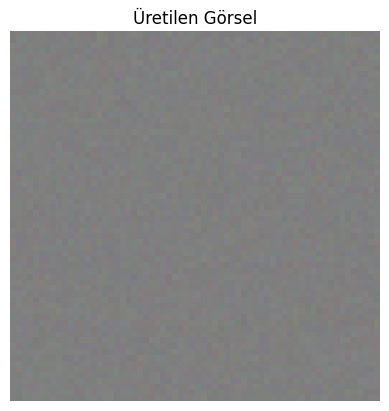

In [ ]:
visualize(model, dataset, bert, idx=0)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TextToImageMLP().to(device)
bert = bert.to(device)

def train(model, dataloader, bert, epochs=5, lr=1e-4):
    ...
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        with torch.no_grad():
            emb = bert(input_ids=input_ids, attention_mask=attention_mask).pooler_output

        ...
        outputs = model(emb)
        target = torch.randn_like(outputs)
        ...


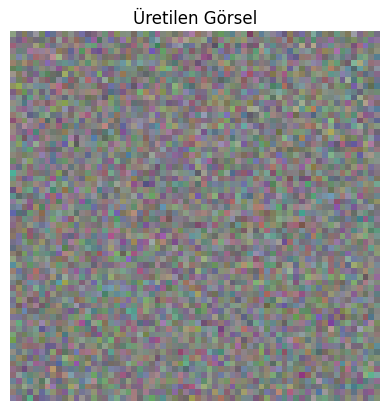

In [ ]:
model = TextToImageMLP().to(device)
train(model, dataloader, bert, epochs=3)
visualize(model, dataset, bert, idx=0)
